In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
from dask import dataframe as dd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Carregar arquivo com os microdados

In [2]:
df = pd.read_parquet('MICRODADOS_ENEM_2021.parquet')

Substituir o dicionário

In [14]:
# Criação do dicionário de substituição
substitutions = {0: "Não Declarado", 
                 1: "Branca", 
                 2: "Preta", 
                 3: "Parda", 
                 4: "Amarela", 
                 5: "Indígena", 
                 6: "Sem Informação"}

# Substituição dos valores da coluna "TP_COR_RACA" pelos valores do dicionário
df['TP_COR_RACA'] = df['TP_COR_RACA'].replace(substitutions)

Dados de PIB - IBGE

In [5]:
pib = pd.read_excel(r'C:\Users\pamst\OneDrive\Documents\Projects\enem - microdados\microdados_enem_2021\pibmunicipal_ipeadata.xls',
                   usecols = ['Codigo', '2019'])
pib.columns = ['CO_MUNICIPIO_PROVA', 'PIB_2019']

In [6]:
pib[pib['PIB_2019'] != pib['PIB_2019']].shape[0], pib.shape[0]

(32, 5596)

In [7]:
df = df.merge(pib, on = 'CO_MUNICIPIO_PROVA', how = 'left')

Análise exploratória inicial

In [13]:
df.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'PIB_2019'],
      dtype='object')

In [38]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

df[notas].describe().round(2)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,2245844.00,2378379.00,2378379.00,2245844.00,2378379.00
mean,491.79,519.94,502.56,535.08,613.50
std,80.57,95.79,79.16,110.63,190.71
min,0.00,0.00,0.00,0.00,0.00
25%,431.00,445.40,447.60,444.70,520.00
50%,482.00,521.90,505.90,515.40,600.00
75%,545.80,589.30,558.80,613.90,740.00
max,867.10,846.90,826.10,953.10,1000.00


Análise exploratória

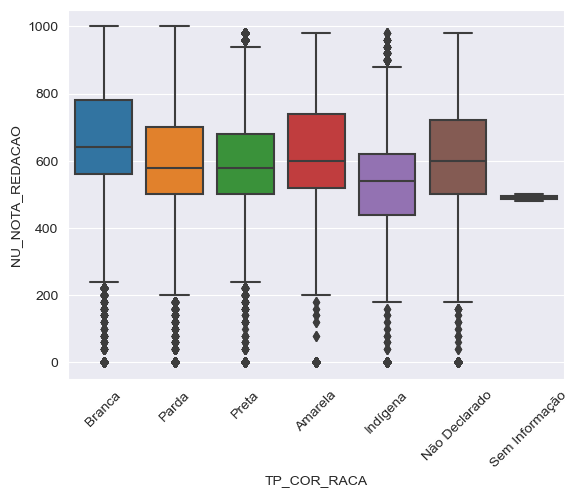

In [16]:
sns.set_style("darkgrid")

p = sns.boxplot(data = df, x = 'TP_COR_RACA', y = 'NU_NOTA_REDACAO')
plt.xticks(rotation=45)
plt.show()

In [17]:
counts = df['TP_COR_RACA'].value_counts()
percentages = counts.apply(lambda x: x / len(df))
print(percentages)

Parda             0.429949
Branca            0.401865
Preta             0.121334
Não Declarado     0.020989
Amarela           0.020205
Indígena          0.005657
Sem Informação    0.000001
Name: TP_COR_RACA, dtype: float64


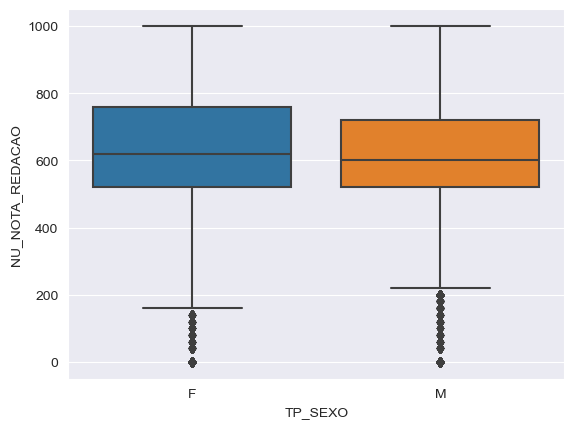

In [18]:
p = sns.boxplot(data = df, x = 'TP_SEXO', y = 'NU_NOTA_REDACAO')
plt.show()

In [19]:
counts = df['TP_SEXO'].value_counts()
percentages = counts.apply(lambda x: x / len(df))
print(percentages)

F    0.616705
M    0.383295
Name: TP_SEXO, dtype: float64
